In [1]:
# For division
from __future__ import division
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt

%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader as web

# For time stamps
from datetime import datetime

In [2]:
# The tech stocks we'll use for this analysis
ticker = ['TSLA']

# To Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 40,end.month,end.day)


# Creating loop for grabing yahoo finance data and setting as a dataframe

for stock in ticker:   
    
    #To set DataFrame as the Stock Ticker
    
    globals()[stock] = web.DataReader(stock,'yahoo',start,end)['Adj Close']

In [3]:
TSLA.head()

Date
2010-06-29    23.889999
2010-06-30    23.830000
2010-07-01    21.959999
2010-07-02    19.200001
2010-07-06    16.110001
Name: Adj Close, dtype: float64

In [4]:
TSLA.tail()

Date
2020-07-09    1394.280029
2020-07-10    1544.650024
2020-07-13    1497.060059
2020-07-14    1516.800049
2020-07-15    1505.000000
Name: Adj Close, dtype: float64

In [5]:
TSLA.shape

(2529,)

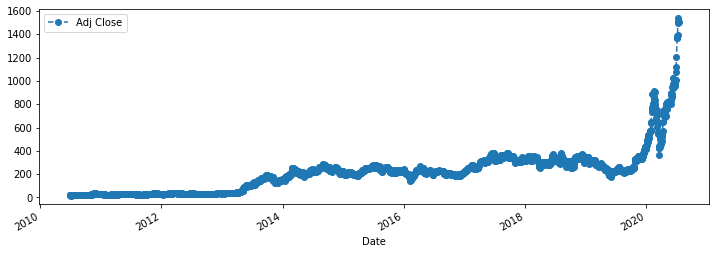

In [7]:
TSLA.plot(figsize=(12,4),legend=True, linestyle='--', marker='o')

In [8]:
TSLA.describe()

count    2529.000000
mean      214.337031
std       181.321443
min        15.800000
25%        35.150002
50%       218.339996
75%       285.359985
max      1544.650024
Name: Adj Close, dtype: float64

In [9]:
df = TSLA
df.head()

Date
2010-06-29    23.889999
2010-06-30    23.830000
2010-07-01    21.959999
2010-07-02    19.200001
2010-07-06    16.110001
Name: Adj Close, dtype: float64

In [10]:
df.describe()

count    2529.000000
mean      214.337031
std       181.321443
min        15.800000
25%        35.150002
50%       218.339996
75%       285.359985
max      1544.650024
Name: Adj Close, dtype: float64

In [11]:
df = df.reset_index()

In [12]:
df.head()

,Date,Adj Close
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001


In [13]:
df[['ds','y']] = df[['Date' ,'Adj Close']]

In [14]:

df = df[['ds','y']]
df.head()

,ds,y
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001


In [15]:
# Importing the prophet library:

import fbprophet

In [16]:
# After importing the prophet library we need to create an instance of a Prophet object
#Instantiating: Instantiation − The creation of an instance of a class. Method − A special kind of function that is defined in a class definition. Object − A unique instance of a data structure that's defined by its class. An object comprises both data members (class variables and instance variables) and methods.
#https://www.tutorialspoint.com/python/python_classes_objects.htm

m = fbprophet.Prophet()

In [17]:
# Now we have to use the fit method on the prophet object and pass in our dataframe because we need to fit our model to our historical data.

m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
# Now it is time to create future dates, using Prophet and its builtin helper function "make_future_dataframe"

future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2889,2021-07-11
2890,2021-07-12
2891,2021-07-13
2892,2021-07-14
2893,2021-07-15


In [19]:
# Now it is time to predict future stock prices using the predict method

forecast = m.predict(future)

forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2889,2021-07-11,883.995375,812.299349,1067.215353,824.113539,944.138512,51.098531,51.098531,51.098531,1.421459,1.421459,1.421459,49.677072,49.677072,49.677072,0.0,0.0,0.0,935.093906
2890,2021-07-12,884.615190,802.092889,1057.120466,824.513428,944.919305,47.108227,47.108227,47.108227,-0.117065,-0.117065,-0.117065,47.225292,47.225292,47.225292,0.0,0.0,0.0,931.723417
2891,2021-07-13,885.235005,796.843152,1062.506176,824.913317,945.700098,44.835102,44.835102,44.835102,0.340655,0.340655,0.340655,44.494447,44.494447,44.494447,0.0,0.0,0.0,930.070108
2892,2021-07-14,885.854821,794.674410,1058.710127,825.313207,946.480890,42.023216,42.023216,42.023216,0.506308,0.506308,0.506308,41.516908,41.516908,41.516908,0.0,0.0,0.0,927.878036
2893,2021-07-15,886.474636,794.054588,1048.240196,825.566141,947.261683,37.415662,37.415662,37.415662,-0.913951,-0.913951,-0.913951,38.329613,38.329613,38.329613,0.0,0.0,0.0,923.890298


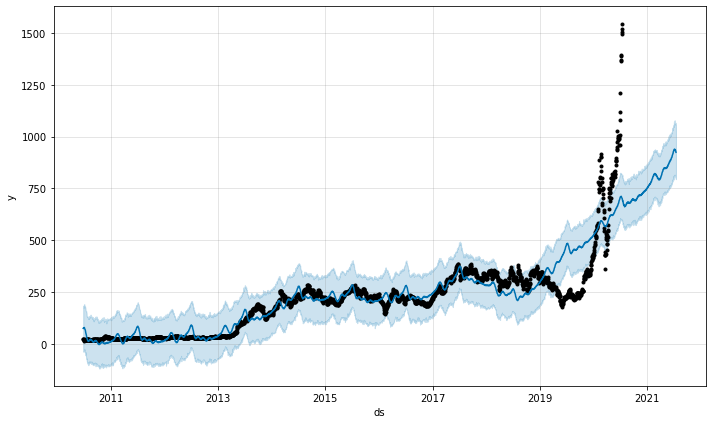

In [21]:
# Visualisation:

m.plot(forecast);

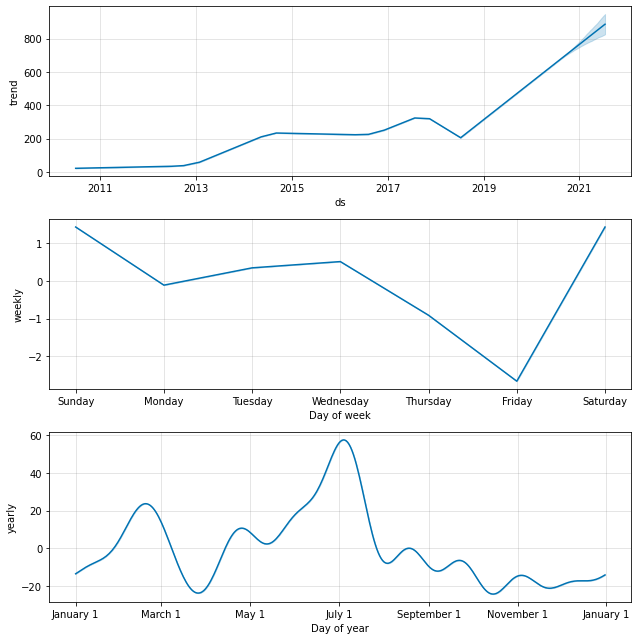

In [23]:
# If you want to visualize the individual forecast components, you can use Prophet’s built-in plot_components method:

m.plot_components(forecast);

In [24]:
df.describe()

,y
count,2529.000000
mean,214.337031
std,181.321443
min,15.800000
25%,35.150002
50%,218.339996
75%,285.359985
max,1544.650024


In [25]:
df.shape

(2529, 2)

In [26]:
forecast.shape

(2894, 19)

In [27]:
forecast.describe()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
count,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.0,2894.0,2894.0,2894.000000
mean,285.210816,173.696800,396.194126,282.346856,288.107993,-0.332355,-0.332355,-0.332355,-0.495561,-0.495561,-0.495561,0.163206,0.163206,0.163206,0.0,0.0,0.0,284.878461
std,236.216239,236.784894,239.740657,229.772278,242.970624,19.949128,19.949128,19.949128,1.197452,1.197452,1.197452,19.914841,19.914841,19.914841,0.0,0.0,0.0,238.099168
min,21.001915,-119.457435,98.378293,21.001915,21.001915,-26.978671,-26.978671,-26.978671,-2.658866,-2.658866,-2.658866,-24.326665,-24.326665,-24.326665,0.0,0.0,0.0,-4.273749
25%,92.285371,-11.777122,208.138347,92.285371,92.285371,-16.479459,-16.479459,-16.479459,-0.913951,-0.913951,-0.913951,-15.906970,-15.906970,-15.906970,0.0,0.0,0.0,96.764371
50%,228.951415,119.192035,341.932982,228.951415,228.951415,-6.073861,-6.073861,-6.073861,-0.117065,-0.117065,-0.117065,-5.813172,-5.813172,-5.813172,0.0,0.0,0.0,230.074866
75%,338.402921,241.009054,462.220124,338.402921,338.402921,9.765406,9.765406,9.765406,0.340655,0.340655,0.340655,10.274917,10.274917,10.274917,0.0,0.0,0.0,351.645377
max,886.474636,816.483850,1078.528560,825.566141,947.261683,58.907253,58.907253,58.907253,1.421459,1.421459,1.421459,57.493001,57.493001,57.493001,0.0,0.0,0.0,938.563920
